In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def contrast_stretching(img, a, b, va, vb):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    Y, U, V= cv2.split(img)
    L = Y.max()
    if a == 0 :
        a = 1e-5
    if b == 0 :
        b = 1e-3
    alpha = va / a
    beta = (vb - va) / (b - a)
    gamma = (L - vb) / (L - b)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if Y[i][j] < a :
                Y[i][j] = alpha * Y[i][j]
            elif Y[i][j] < b :
                Y[i][j] = va + beta*(Y[i][j]-a)
            else :
                Y[i][j] = vb + gamma*(Y[i][j]-b)
    
    img = cv2.merge((Y, U, V))
    res = cv2.cvtColor(img, cv2.COLOR_YUV2RGB)
    return res # RGB

In [ ]:
def histogram_equalization(img):
    img_YUV = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    Y, U, V = cv2.split(img_YUV)
    Y_normalized = cv2.normalize(Y, Y, 0, 255, cv2.NORM_MINMAX)

    hist_original = np.zeros((256,), dtype=np.float32)
    ROW, COL = Y_normalized.shape
    for r in range(ROW):
        for c in range(COL):
            hist_original[Y_normalized[r, c]] += 1

    pdf_original = hist_original / (ROW * COL)  
    cdf_original = np.cumsum(pdf_original)  
    equalize = np.uint8(255 * cdf_original)

    Y_equalized = Y_normalized.copy()
    for r in range(ROW):
        for c in range(COL):
            Y_equalized[r, c] = equalize[Y_normalized[r, c]]

    hist_equalized = np.zeros((256,), dtype=np.float32)
    for r in range(ROW):
        for c in range(COL):
            hist_equalized[Y_equalized[r, c]] += 1

    pdf_equalized = hist_equalized / (ROW * COL)  
    cdf_equalized = np.cumsum(pdf_equalized)  

    plt.figure(figsize=(10,5)) 
    plt.subplot(1, 2, 1) 
    ax1 = plt.gca()  
    ax1.bar(range(256), pdf_original, color='r', label='PDF') 
    ax1.set_xlim([0, 255])
    ax2 = ax1.twinx()
    ax2.plot(cdf_original, color='g', label='CDF')
    plt.title('Original PDF and CDF')
    plt.subplot(1, 2, 2)  
    ax1 = plt.gca()
    ax1.bar(range(256), pdf_equalized, color='b', label='PDF') 
    ax1.set_xlim([0, 255])

    ax2 = ax1.twinx()
    ax2.plot(cdf_equalized, color='m', label='CDF')  
    ax2.set_xlim([0, 255])
    plt.title('Equalized PDF and CDF')
    
    plt.tight_layout()  
    plt.show()

    img_merged = cv2.merge((Y_equalized, U, V))
    res = cv2.cvtColor(img_merged, cv2.COLOR_YUV2RGB)

    return res # RGB

In [4]:
def main():
    backlight1 = cv2.imread('./pic/backlight1.bmp')
    backlight2 = cv2.imread('./pic/backlight2.bmp')
    backlight3 = cv2.imread('./pic/backlight3.bmp')
    backlight1 = cv2.cvtColor(backlight1, cv2.COLOR_BGR2RGB)
    backlight2 = cv2.cvtColor(backlight2, cv2.COLOR_BGR2RGB)
    backlight3 = cv2.cvtColor(backlight3, cv2.COLOR_BGR2RGB)
    
    backlight1_contrast_stretched_1 = contrast_stretching(backlight1, 0, 50, 0, 100)
    backlight2_contrast_stretched_1 = contrast_stretching(backlight2, 0, 50, 0, 100)
    backlight3_contrast_stretched_1 = contrast_stretching(backlight3, 0, 50, 0, 100)
    
    backlight1_contrast_stretched_2 = contrast_stretching(backlight1, 60, 180, 120, 180)
    backlight2_contrast_stretched_2 = contrast_stretching(backlight2, 60, 180, 120, 180)
    backlight3_contrast_stretched_2 = contrast_stretching(backlight3, 60, 180, 120, 180)
    
    backlight1_histogram_equalized = histogram_equalization(backlight1)
    backlight2_histogram_equalized = histogram_equalization(backlight2)
    backlight3_histogram_equalized = histogram_equalization(backlight3)
    
    plt.figure(figsize=(12, 10))
    
    plt.subplot(3, 4, 1)
    plt.imshow(backlight1)
    plt.title('Original Image 1')
    
    plt.subplot(3, 4, 2)
    plt.imshow(backlight1_contrast_stretched_1)
    plt.title('Contrast Stretching Image 1_1')
    
    plt.subplot(3, 4, 3)
    plt.imshow(backlight1_contrast_stretched_2)
    plt.title('Contrast Stretching Image 1_2')
    
    plt.subplot(3, 4, 4)
    plt.imshow(backlight1_histogram_equalized)
    plt.title('Histogram Equalization Image 1')
    
    plt.subplot(3, 4, 5)
    plt.imshow(backlight2)
    plt.title('Original Image 2')
    
    plt.subplot(3, 4, 6)
    plt.imshow(backlight2_contrast_stretched_1)
    plt.title('Contrast Stretching Image 2_1')
    
    plt.subplot(3, 4, 7)
    plt.imshow(backlight2_contrast_stretched_2)
    plt.title('Contrast Stretching Image 2_2')
    
    plt.subplot(3, 4, 8)
    plt.imshow(backlight2_histogram_equalized)
    plt.title('Histogram Equalization Image 2')
    
    plt.subplot(3, 4, 9)
    plt.imshow(backlight3)
    plt.title('Original Image 3')
    
    plt.subplot(3, 4, 10)
    plt.imshow(backlight3_contrast_stretched_1)
    plt.title('Contrast Stretching Image 3_1')
    
    plt.subplot(3, 4, 11)
    plt.imshow(backlight3_contrast_stretched_2)
    plt.title('Contrast Stretching Image 3_2')
    
    plt.subplot(3, 4, 12)
    plt.imshow(backlight3_histogram_equalized)
    plt.title('Histogram Equalization Image 3')
    plt.tight_layout()
    plt.show()
    
    return

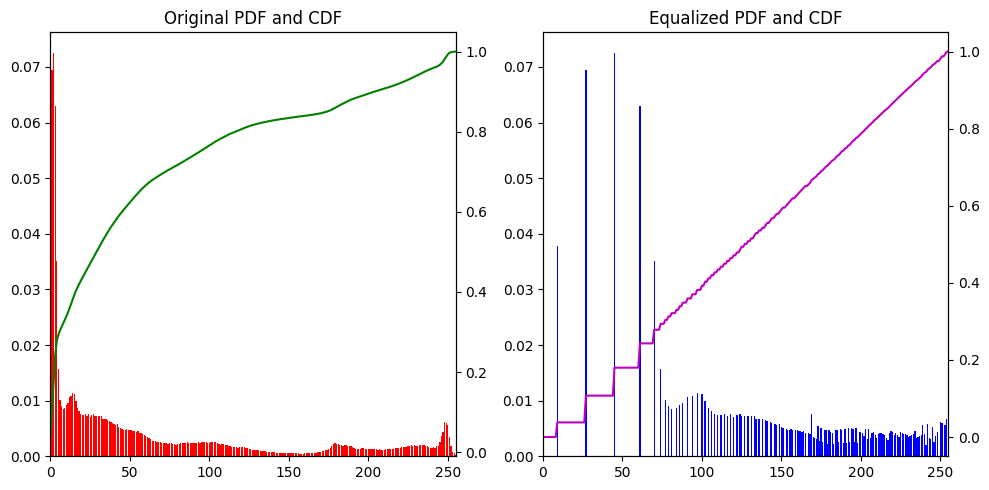

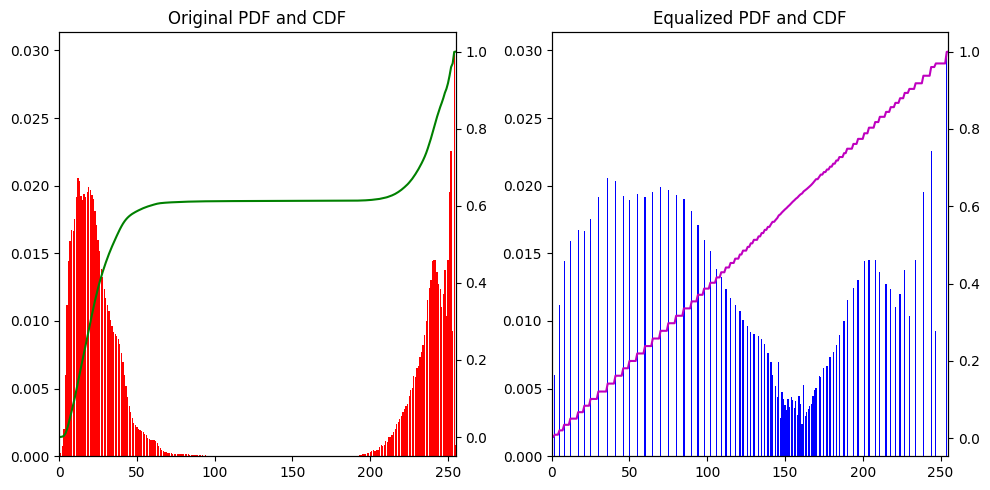

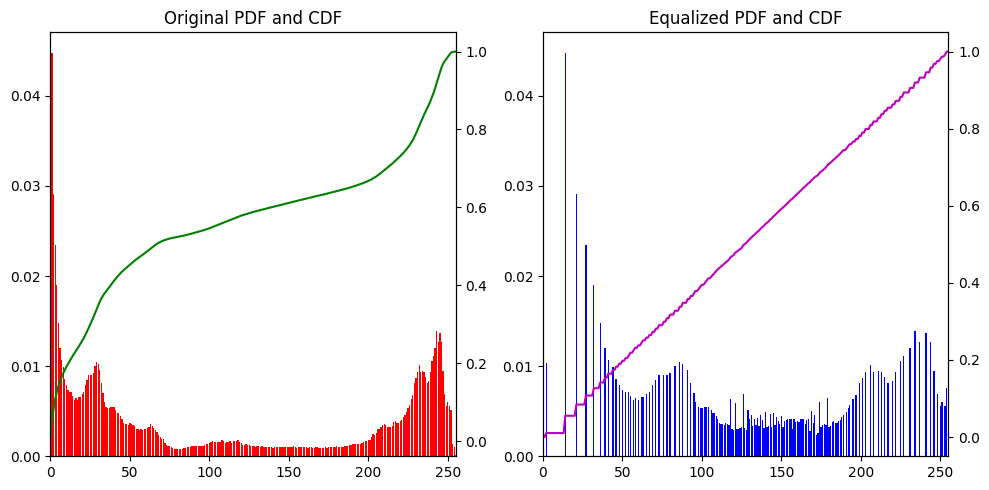

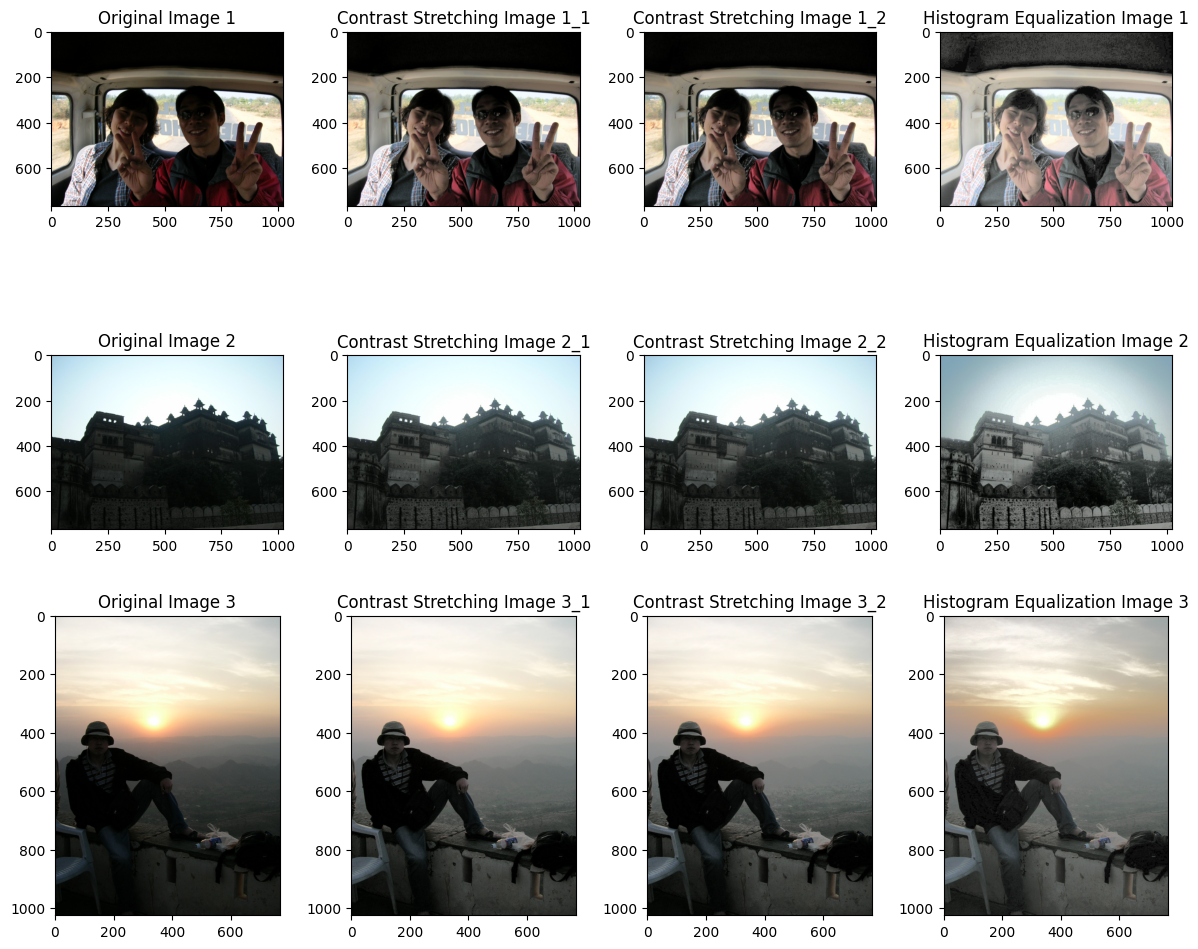

In [5]:
if __name__ == "__main__":
    main()